RMSE - D:/FPT.csv : 3.8124014019062926
Coefficients: [0.00000000e+000 0.00000000e+000 9.76331415e-145 2.26155231e-126
 4.76157332e-108 9.39935783e-090]


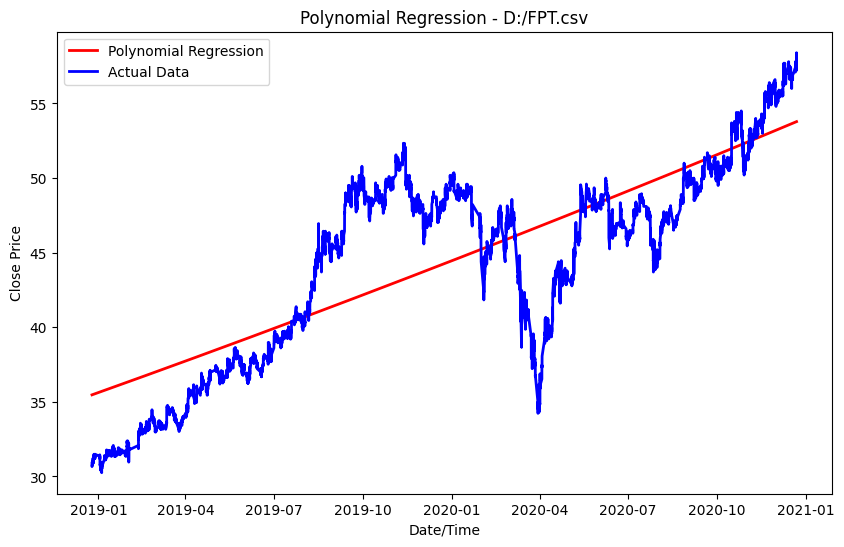

RMSE - D:/MSN.csv : 11.193907485691916
Coefficients: [ 0.00000000e+000  0.00000000e+000 -1.38107879e-144 -3.14099573e-126
 -6.54786589e-108 -1.27991688e-089]


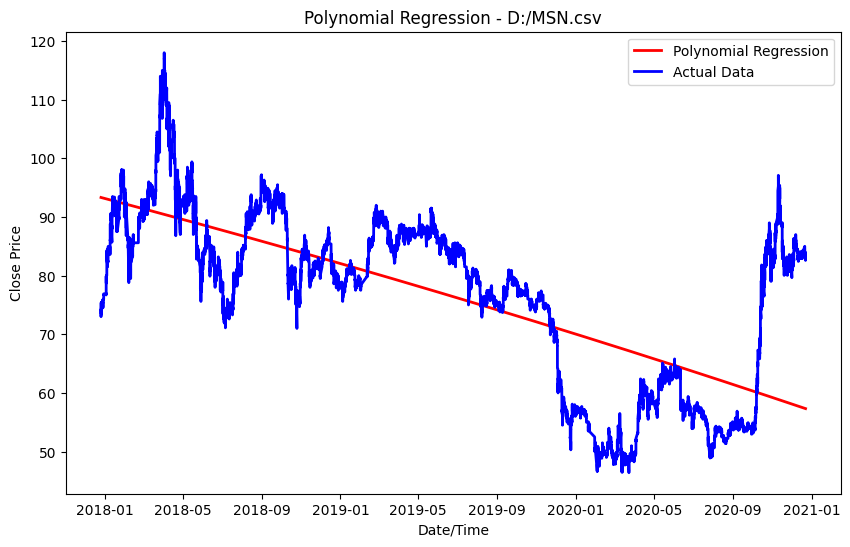

RMSE - D:/PNJ.csv : 9.024430410456945
Coefficients: [ 0.00000000e+000  0.00000000e+000 -5.57801180e-145 -1.27326718e-126
 -2.65785407e-108 -5.20216972e-090]


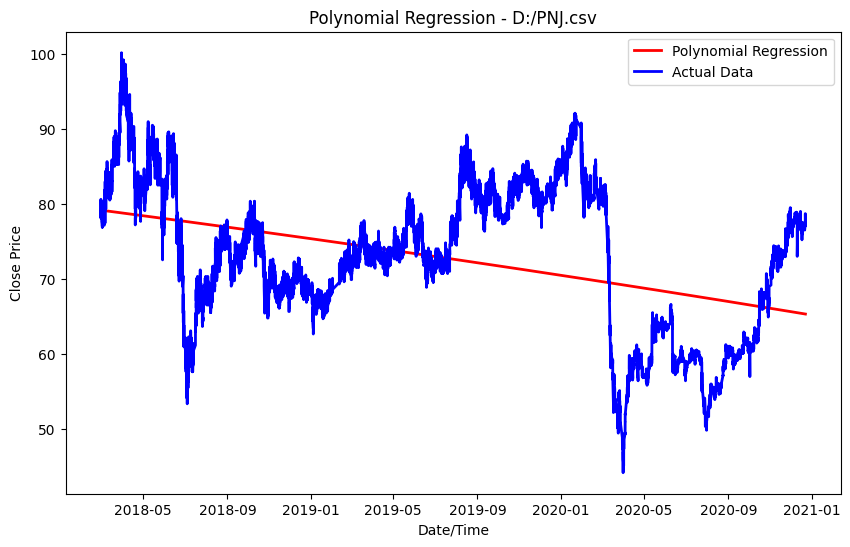

RMSE - D:/VIC.csv : 10.335205622772154
Coefficients: [ 0.00000000e+000  0.00000000e+000 -8.68354988e-145 -2.00718647e-126
 -4.21531157e-108 -8.30013065e-090]


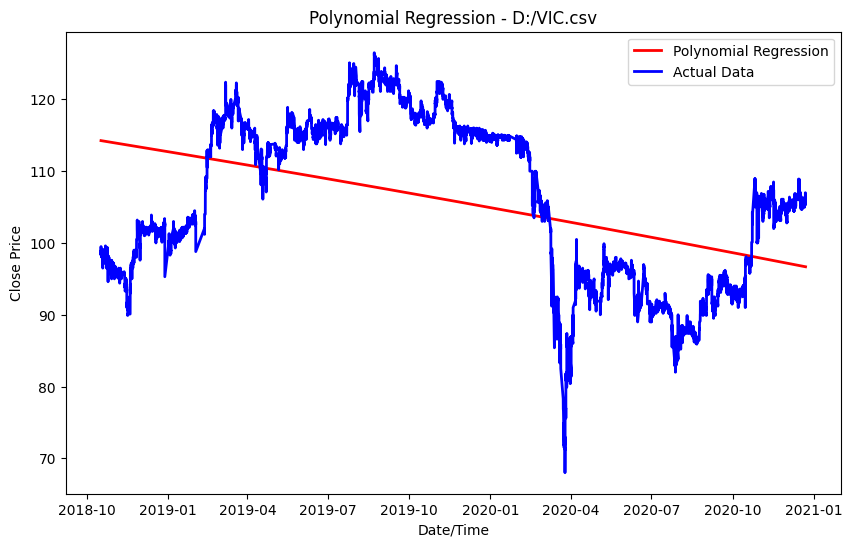

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# File paths
fpt_path = 'D:/FPT.csv'
msn_path = 'D:/MSN.csv'
pnj_path = 'D:/PNJ.csv'
vic_path = 'D:/VIC.csv'

# Perform polynomial regression and plot for each file path
file_paths = [fpt_path, msn_path, pnj_path, vic_path]

for path in file_paths:
    # Read data from CSV file into DataFrame
    data_df = pd.read_csv(path)

    # Rename columns to match the desired format
    data_df.columns = ['Ticker', 'Date/Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Open Interest']

    # Convert 'Date/Time' column to standard format
    data_df['Date/Time'] = pd.to_datetime(data_df['Date/Time'])

    # Select the desired features and target variable
    X = data_df['Date/Time'].values.reshape(-1, 1)
    y = data_df['Close'].values

    # Define the degree of the polynomial
    degree = 5  # You can adjust the degree as needed

    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Make predictions
    y_pred = model.predict(X_poly)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    print("RMSE -", path, ":", rmse)
    coefficients = model.coef_
    print("Coefficients:", coefficients)

    # Sort the data for plotting
    sort_idx = np.argsort(X[:, 0])
    X_sorted = X[sort_idx]
    y_pred_sorted = y_pred[sort_idx]

    # Plot the data and predictions
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, label='Polynomial Regression')
    ax.plot(X, y, color='blue', linewidth=2, label='Actual Data')
    ax.set_xlabel('Date/Time')
    ax.set_ylabel('Close Price')
    ax.set_title('Polynomial Regression - ' + path)
    ax.legend()
    plt.show()